In [165]:
import osmnx as ox
import networkx as nx
import requests
import geopandas
import matplotlib.cm as cm
import matplotlib.pyplot as plt
from shapely.geometry import shape
import shapely
import matplotlib.colors as colors
import folium
ox.config(use_cache=True, log_console=True)
ox.__version__

'0.9'

## Create a graph and figure from an address

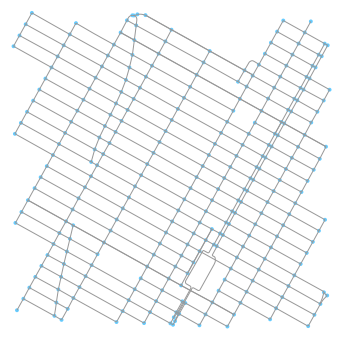

In [166]:
rockfellerGraph = ox.graph_from_address('45 Rockefeller Plaza, New York, USA', network_type='drive', simplify=True)
fig, ax = ox.plot_graph(rockfellerGraph)

## Convert Address to Geocode

In [178]:
rockfellerGeocode = ox.geocode('45 Rockefeller Plaza, New York, USA')

## Function to convert nodes to geocodes

In [167]:
def nodeToGeo():
    gdfs = ox.graph_to_gdfs(rockfellerGraph, nodes=True, edges=False) 
    return [(point.y,point.x) for point in gdfs.geometry.to_frame().transpose().values[0].tolist()]


    

## Function to find node index from geocode

In [177]:
def geoToNodeValue(geocode):
    gdfs = ox.graph_to_gdfs(rockfellerGraph, nodes=True, edges=False)  
    try:
        print(x)
        return [(point.y,point.x) for point in gdfs.geometry.to_frame().transpose().values[0].tolist()].index(geocode)
    except:        
        return -1

## Example pathfinding with node value

In [169]:
origin_node = list(rockfellerGraph.nodes())[0]
destination_node = list(rockfellerGraph.nodes())[-2]

In [170]:
route = nx.shortest_path(rockfellerGraph, origin_node, destination_node)

In [171]:
route_map = ox.plot_route_folium(rockfellerGraph, route)

In [175]:
route_map

## Example of graph printed on the map

In [172]:
ox.plot_graph_folium(rockfellerGraph)

## Example of marker on map from each graph node

In [173]:
m = folium.Map(
    location=rockfellerGeocode
)

tooltip = 'Click me!'

#folium.Marker(rockfellerGeocode, popup='<i>Mt. Hood Meadows</i>', tooltip=tooltip).add_to(m)
#folium.Marker([45.3311, -121.7113], popup='<b>Timberline Lodge</b>', tooltip=tooltip).add_to(m)

for p in nodeToGeo():
    folium.Marker(p, popup='<i>Mt. Hood Meadows</i>', tooltip=tooltip).add_to(m)


In [174]:
m